In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
wine_data = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/winequality-white.csv')

In [15]:
column = wine_data.columns[0].split(";")
for i in range(len(column)):
    column[i] = column[i].strip('"')

In [17]:
observations =[]
for i in range(len(wine_data)):
    obs = wine_data.iloc[i][0]
    obs = obs.split(";")
    for i in range(len(obs)):
        obs[i] = float(obs[i])
    observations.append(obs)

In [18]:
df = pd.DataFrame(observations,columns=column)

In [19]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null float64
dtypes: float64(12)
memory usage: 459.3 KB


* No missing values
* quality is our target variable

In [21]:
# check the distribution of data
df.skew()

fixed acidity           0.647751
volatile acidity        1.576980
citric acid             1.281920
residual sugar          1.077094
chlorides               5.023331
free sulfur dioxide     1.406745
total sulfur dioxide    0.390710
density                 0.977773
pH                      0.457783
sulphates               0.977194
alcohol                 0.487342
quality                 0.155796
dtype: float64

* volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide are highly positively skewed.
* These variables seem to have outliers.

(array([2.300e+01, 4.480e+02, 2.405e+03, 1.548e+03, 3.850e+02, 8.200e+01,
        5.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 3.8 ,  4.84,  5.88,  6.92,  7.96,  9.  , 10.04, 11.08, 12.12,
        13.16, 14.2 ]),
 <a list of 10 Patch objects>)

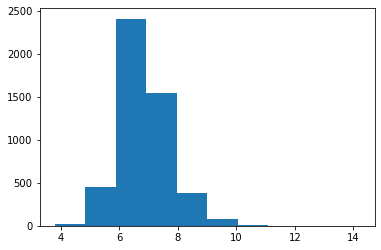

In [24]:
plt.hist(df['fixed acidity'])

(array([7.300e+02, 2.265e+03, 1.316e+03, 4.010e+02, 1.070e+02, 5.800e+01,
        1.300e+01, 2.000e+00, 4.000e+00, 2.000e+00]),
 array([0.08 , 0.182, 0.284, 0.386, 0.488, 0.59 , 0.692, 0.794, 0.896,
        0.998, 1.1  ]),
 <a list of 10 Patch objects>)

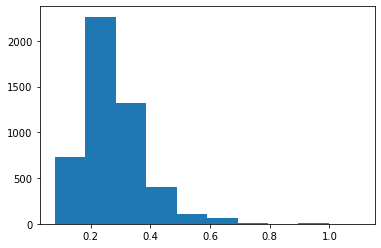

In [25]:
plt.hist(df['volatile acidity'])

* Asymmetrical distribution
* Positively skewed
* outliers towards third quartile

(array([2.190e+02, 2.651e+03, 1.679e+03, 2.450e+02, 9.200e+01, 5.000e+00,
        5.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([0.   , 0.166, 0.332, 0.498, 0.664, 0.83 , 0.996, 1.162, 1.328,
        1.494, 1.66 ]),
 <a list of 10 Patch objects>)

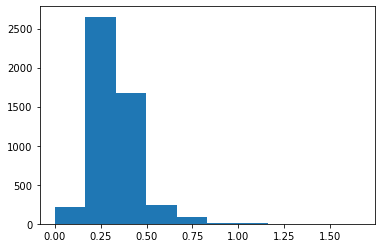

In [26]:
plt.hist(df['citric acid'])

(array([2.394e+03, 2.329e+03, 7.300e+01, 3.500e+01, 3.900e+01, 1.800e+01,
        5.000e+00, 2.000e+00, 2.000e+00, 1.000e+00]),
 array([0.009 , 0.0427, 0.0764, 0.1101, 0.1438, 0.1775, 0.2112, 0.2449,
        0.2786, 0.3123, 0.346 ]),
 <a list of 10 Patch objects>)

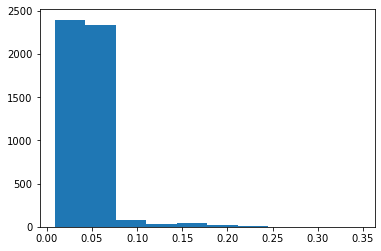

In [27]:
plt.hist(df['chlorides'])

In [28]:
target = df.quality
for i in range(len(target)):
    target[i] = int(target[i])
features = df.drop(columns=['quality'])

### Data preprocessing
* Robust scalar is robust to outliers
* will use robust scalar

In [30]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler(quantile_range=(0.0, 75.0))

In [31]:
feature_transformed = rs.fit_transform(features)

### Split the data

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_transformed, target, test_size=0.33, random_state=42)

### Build the model

In [33]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()

In [34]:
## linear regression prediction
lin_model.fit(X_train, y_train)
pred = lin_model.predict(X_test)

# accuracy checking
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score
print(mean_squared_error(y_test, pred))

0.557576792054179
